# Библиотеки

In [56]:
import numpy as np
from itertools import *
from more_itertools import *
from sympy import *
from scipy.special import *
import math
from fractions import Fraction
from scipy.stats import *
from tqdm.notebook import tqdm

# 1
Дискретные случайные величины $X_1, X_2, X_3$ независимы и имеют одинаковое распределение:
|$X_k$| 1 | 2 | 3 | 4 | 5 |
|:----|:-:|:-:|:-:|:-:|:-:|
|$\mathbb P$|0,2|0,2|0,2|0,2|0,2|

Пусть $Y = max \{ X_1; X_2; X_3 \}$. Найдите распреление $Y$

## Аналитика

$F(x) = P(X \leqslant x)$; $P(X \leqslant x)$ - вероятность того, что случайная величина $X$ примет значение меньшее, чем переменная $x$  
Тк $Y = max \{ X_1; X_2; X_3 \}$, то $Y = y$ тогда и только тогда, когда хотя бы одна $X_1, X_2, X_3$ принимает значение y. То есть:  
$\mathbb P(y = 1) = 0,2^3 \cdot 1 = 0,008$  
$\mathbb P(y = 2) = 0,2^3 \cdot (2^3 - 1) = 0,056$  
$\mathbb P(y = 3) = 0,2^3 \cdot (3^3 - 2^3) = 0,152$  
$\mathbb P(y = 4) = 0,2^3 \cdot (4^3 - 3^3) = 0,296$  
$\mathbb P(y = 5) = 0,2^3 \cdot (5^3 - 4^3) = 0,488$  

Распредление $Y$:   
|$Y_k$| 1 | 2 | 3 | 4 | 5 |
|:----|:-:|:-:|:-:|:-:|:-:|
|$\mathbb P$|0,008|0,056|0,152|0,296|0,488|

# 2
Дискретная случайная величина $X$ принимает только целые значения $1; 2;
3; 4; 5$ и $6$, при этом все указанные значения равновероятны. Пусть $Y_n$ –
остаток от деления $X$ на $n$ ($n$ = 2 или $n$ = 3).  
Верно ли, что $Y_2$ и $Y_3$ независимы.   
Решить ту же задачу, если распределение X пропорционально
принимаемым значениям, т.е. $\mathbb P(X = k) = A \cdot k, k = 1 \ldots 6$

## Аналитика

Ряд распределения для $X$:
|$X$| 1 | 2 | 3 | 4 | 5 | 6 |
|:----|:-:|:-:|:-:|:-:|:-:|:-:|
|$\mathbb P$|$A$|$A$|$A$|$A$|$A$|$A$|  

|$Y_2$| 0 | 1 |
|:---:|:-:|:-:|
|$\mathbb P$|$3A$|$3A$|

|$Y_3$| 0 | 1 | 2 |
|:---:|:-:|:-:|:-:|
|$\mathbb P$|$2A$|$2A$|$2A$|


где $A \in \mathbb R$

Проверка на независимость:
| $Y_2$ | $Y_3$ | 0 | 1 | 2 | 
|:-----:|:-----:|:-:|:-:|:-:|
| 0 | $\frac{1}{6}$ |||||
| 1 | $\frac{1}{6}$ |||||

Независимость не выполняется, тк:  
$\frac{1}{6} \cdot \frac{1}{6} \neq \frac{1}{6} + \frac{1}{6}$


# 3
Независимые случайные величины $X, Y, Z$ могут принимать только целые
значения: $X$ – от $0$ до $12$ c вероятностью $\frac{1}{13}$, $Y$ – от $0$ до $13$ с вероятностью $\frac{1}{14}$, а $Z$ только значения $3$ и $7$, при этом $\mathbb P(Z = 3) = \frac{9}{10}$  
Найдите:   
a) вероятность того, что сумма данных случайных величин будет равна $12$ и
доказать ее статистическую устойчивость, построив график зависимости
относительной частоты указанного события от числа экспериментов;  
б)наиболее вероятное значение суммы $X + Y + Z$ и вероятность такого события;   
в) распределение $X + Y + Z$

In [6]:
x = np.arange(0, 13)
y = np.arange(0, 14)
z = [3, 7]

In [7]:
px = [1/13 for _ in range(len(x))]
py = [1/14 for _ in range(len(y))]
pz = [9/10, 1/10]

In [11]:
X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

## Стохастический эксперимент

In [25]:
from itertools import product
Prob=0
for i, j, k in product(list(range(0, 13)), list(range(0, 14)), [3, 7]):
    if i + j + k == 12:
        Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
Prob

0.05274725274725277

In [30]:

s = []
for m in range(3, 33):
    Prob=0
    for i, j, k in product(list(range(0, 13)), list(range(0, 14)), [3, 7]):
        if i + j + k == m:
            Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
    s.append([m, np.round(Prob, 5)])
Matrix(sorted(s)).T

Matrix([
[      3,       4,       5,       6,       7,       8,       9,      10,      11,      12,      13,      14,      15,      16,      17,      18,      19,      20,      21,      22,      23,      24,      25,      26,      27,      28,     29,      30,     31,      32],
[0.00495, 0.00989, 0.01484, 0.01978, 0.02527, 0.03077, 0.03626, 0.04176, 0.04725, 0.05275, 0.05824, 0.06374, 0.06923, 0.06978, 0.06538, 0.06099, 0.05659, 0.05165, 0.04615, 0.04066, 0.03516, 0.02967, 0.02418, 0.01868, 0.01319, 0.00769, 0.0022, 0.00165, 0.0011, 0.00055]])

In [59]:
sum(s, key=lambda x: x[1])

TypeError: 'key' is an invalid keyword argument for sum()

In [61]:
sum = 0
for i in s:
    sum += i[1]
sum

1.0

In [58]:
max(s, key=lambda x: x[1])

[16, 0.06978]

## График

# 4
Независимые случайные величины $X, Y, Z$ принимают только целые значения: $X$ – от $1$ до $15$ с вероятностью $\frac{1}{15}$ , $Y$ – от $1$ до $12$ с вероятностью $\frac{1}{12}$ ,$Z$ – от $1$ до $11$ с вероятностью $\frac{1}{11}$ . Найдите вероятность:  
a) $\mathbb P (X < Y < Z)$;   
б) $\mathbb P (2X < Y < 2Z)$   
и доказать ее статистическую устойчивость, построив
график зависимости относительной частоты указанного события от числа
экспериментов.


In [43]:
x = np.arange(1, 15 + 1)
y = np.arange(1, 12 + 1)
z = np.arange(1, 11 + 1)

In [44]:
px = [1/15 for _ in range(len(x))]
py = [1/12 for _ in range(len(y))]
pz = [1/11 for _ in range(len(z))]

In [50]:
X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

## Стохастический эксперимент

In [63]:
from itertools import product
Prob=0
c = 0
for i, j, k in product(range(1, 15 + 1), range(1, 12 + 1), range(1, 11 + 1)):
    # print(i, j, k)
    if i < j < k:
        c += 1
        Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
Prob

0.09183673469387756

In [52]:
from itertools import product
Prob=0
for i, j, k in product(range(1, 15 + 1), range(1, 12 + 1), range(1, 11 + 1)):
    # print(i, j, k)
    if 2 * i < j < 2 * k:
        Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
Prob

0.103535353535354

# 5
Независимые случайные величины $X, Y, Z$ могут принимать только целые
значения:  
$X$ – от $1$ до $7$ c вероятностью $\frac{1}{7}$,  
$Y$ – от $1$ до $14$ с вероятностью $\frac{1}{14}$  
$Z$ только значения $7$ и $14$, при этом $\mathbb P (Z = 7) = \frac{3}{5}$  
Найдите вероятность того, что сумма данных случайных величин будет не меньше $29$ и
доказать ее статистическую устойчивость, построив график зависимости
относительной частоты указанного события от числа экспериментов.

## Аналитика
Рассмотрим два случая $Z = 7$ и $Z = 14$:  
1) При $Z = 7$ на сумму остается $22$. Но $X + Y \leqslant 21$. Поэтому вероятность такого случая $0$  
2) При $Z = 14$ на сумму остается $15$. То $\mathbb P(A) = \frac{1}{7} \cdot \frac{1}{14} + \frac{1}{7} \cdot \frac{2}{14} + \ldots = \frac{1}{7 \cdot 14} \cdot (1 + 2 + \ldots 7) = \frac{1}{7 \cdot 14} \cdot 28 = \frac{2}{7} \cdot \frac{2}{5} \approx = 0,1143$ 

## Стохастический эксперимент

In [16]:
x = np.arange(1, 7 + 1)
y = np.arange(1, 14 + 1)
z = [7, 14]

In [17]:
px = [1/7 for _ in range(len(x))]
py = [1/14 for _ in range(len(y))]
pz = [3/5, 2/5]

In [18]:
X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [6]:
from itertools import product
Prob=0
for i, j, k in product(range(1, 7 + 1), range(1, 14 + 1), [7, 14]):
    # print(i, j, k)
    if i + j + k >= 29:
        Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
Prob

0.1142857142857142

## График

In [20]:
N = 10_000
x_ax = np.arange(1, N)
y_ax = []

for n in tqdm(range(1, N)):
    x = X.rvs(size=n)
    y = Y.rvs(size=n)
    z = Z.rvs(size=n)

    y_ax.append((x + y + z >= 29).sum() / n)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:26<00:00, 374.23it/s]


In [9]:
def plot_var(x, y, normal_var):
    plt.figure(figsize=(15, 5), dpi=300)
    plt.plot(x, y, label='Относительная Вероятность')
    plt.plot(x, [normal_var] * len(y), label='Вероятность')
    plt.xlabel('Число проведенных реализаций опыта (N)')
    plt.ylabel('Относительная частота $\\hat{p}(A)$')
    plt.title('Статистическая устойчивость')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
y

array([13,  5, 13, ...,  7, 11, 12])

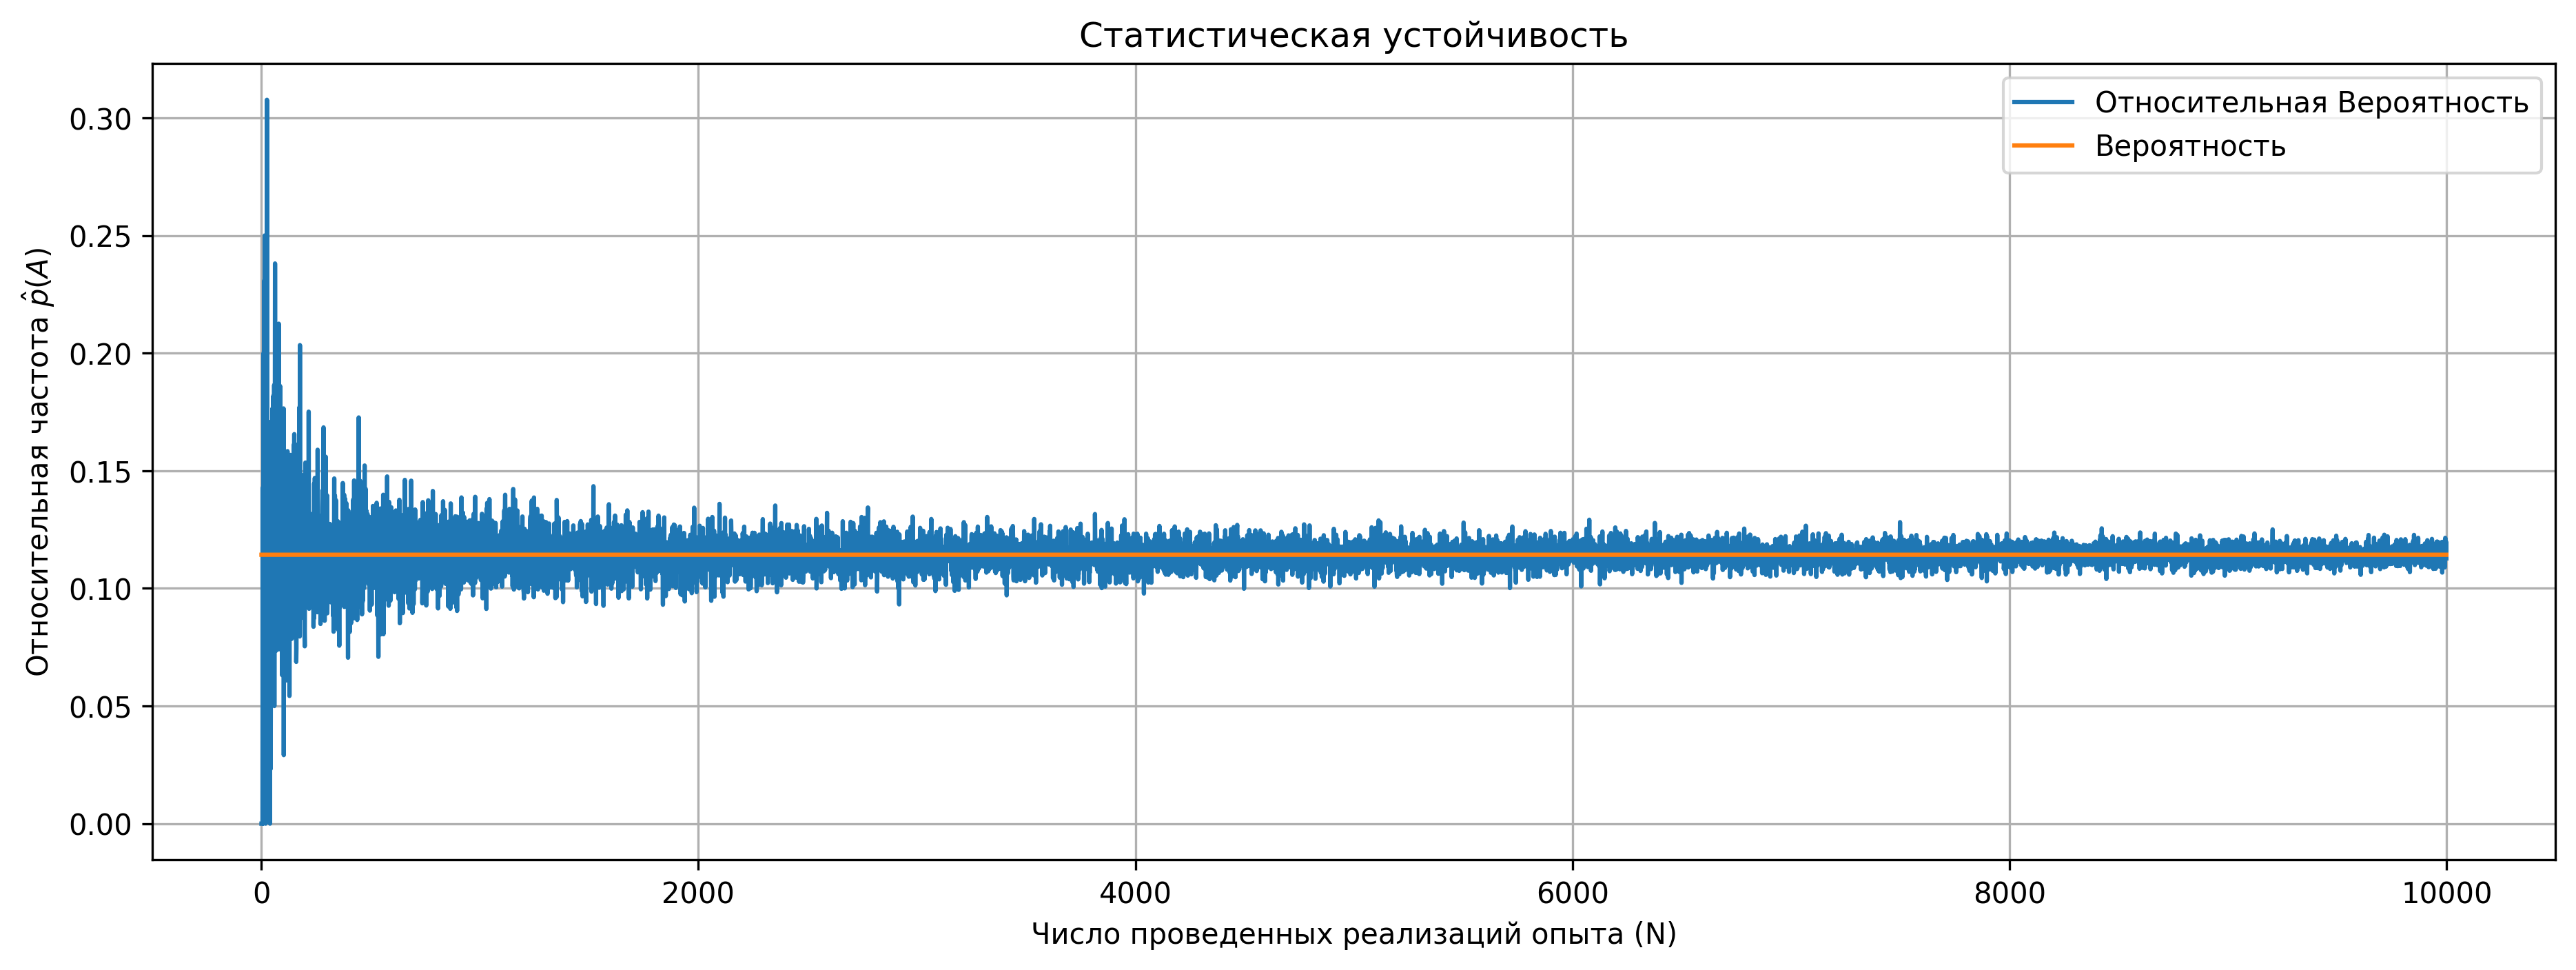

In [22]:
plot_var(x_ax, y_ax, 0.1142857142857142)

# 6
Независимые дискретные случайные величины $X_1, X_2, \ldots, X_9$ принимают
только целые значения, при этом $X_n$ принимает только значения от $0$ до $n$ и все эти значения равновероятны ($n = 1, \ldots , 9$).
Найдите $\mathbb P(X_1X_2 \ldots X9 = 0)$ и доказать ее статистическую устойчивость,
построив график зависимости относительной частоты указанного собы-
тия от числа экспериментов.

## Аналитика

Для того чтобы $X_1X_2 \ldots X_9 = 0$, хотя бы одно из чисел $X_1, X_2, \ldots, X_9$ должно быть равно 0.

Таким образом, $\mathbb P(X_1X_2 \ldots X_9 = 0) = 1 - \mathbb P( X_i \neq 0)$.

Так как $X_i$ принимает значения от $0$ до $i$ и все значения равновероятны, то $\mathbb P(X_i \neq 0) = \frac{i}{i+1}$.

Тогда $\mathbb P(\text{все } X_i \neq 0) = \prod_{i=1}^{9} \frac{i}{i+1} = \frac{1}{2} \cdot \frac{2}{3} \cdot \frac{3}{4} \cdot \ldots \cdot \frac{9}{10} = \frac{1}{10}$.

$\mathbb P(X_1X_2 \ldots X_9 = 0) = 1 - \frac{1}{10} = \frac{9}{10}$.

## Стохастический эксперимент

In [52]:
X1 = np.arange(2)
X2 = np.arange(3)
X3 = np.arange(4)
X4 = np.arange(5)
X5 = np.arange(6)
X6 = np.arange(7)
X7 = np.arange(8)
X8 = np.arange(9)
X9 = np.arange(10)
X = [X1, X2, X3, X4, X5, X6, X7, X8, X9]
X

[array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [53]:
px1 = [1 / len(X1) for _ in range(len(X1))]
px2 = [1 / len(X2) for _ in range(len(X2))]
px3 = [1 / len(X3) for _ in range(len(X3))]
px4 = [1 / len(X4) for _ in range(len(X4))]
px5 = [1 / len(X5) for _ in range(len(X5))]
px6 = [1 / len(X6) for _ in range(len(X6))]
px7 = [1 / len(X7) for _ in range(len(X7))]
px8 = [1 / len(X8) for _ in range(len(X8))]
px9 = [1 / len(X9) for _ in range(len(X9))]

In [54]:
X1 = rv_discrete(name='X1', values=(X1, px1))
X2 = rv_discrete(name='X2', values=(X2, px2))
X3 = rv_discrete(name='X3', values=(X3, px3))
X4 = rv_discrete(name='X4', values=(X4, px4))
X5 = rv_discrete(name='X5', values=(X5, px5))
X6 = rv_discrete(name='X6', values=(X6, px6))
X7 = rv_discrete(name='X7', values=(X7, px7))
X8 = rv_discrete(name='X8', values=(X8, px8))
X9 = rv_discrete(name='X9', values=(X9, px9))
X_ = [X1, X2, X3, X4, X5, X6, X7, X8, X9]

In [ ]:
X1.pmf()

In [ ]:
from functools import reduce
from itertools import product
import operator
Prob=0
for q in tqdm(product(*X)):
    if reduce(operator.mul, q, 1) == 0:
        m = 1
        for i, X_i in zip(q, X_):
            m *= X_i.pmf(i)
        Prob += m
Prob

## График

In [66]:
N = 10_000
x_ax = np.arange(1, N)
y_ax = []

for n in tqdm(range(1, N)):
    x_ = [X_i.rvs(size=n) for X_i in X_]

    y_ax.append((reduce(operator.mul, x_, 1) == 0).sum() / n)

  0%|          | 0/9999 [00:00<?, ?it/s]

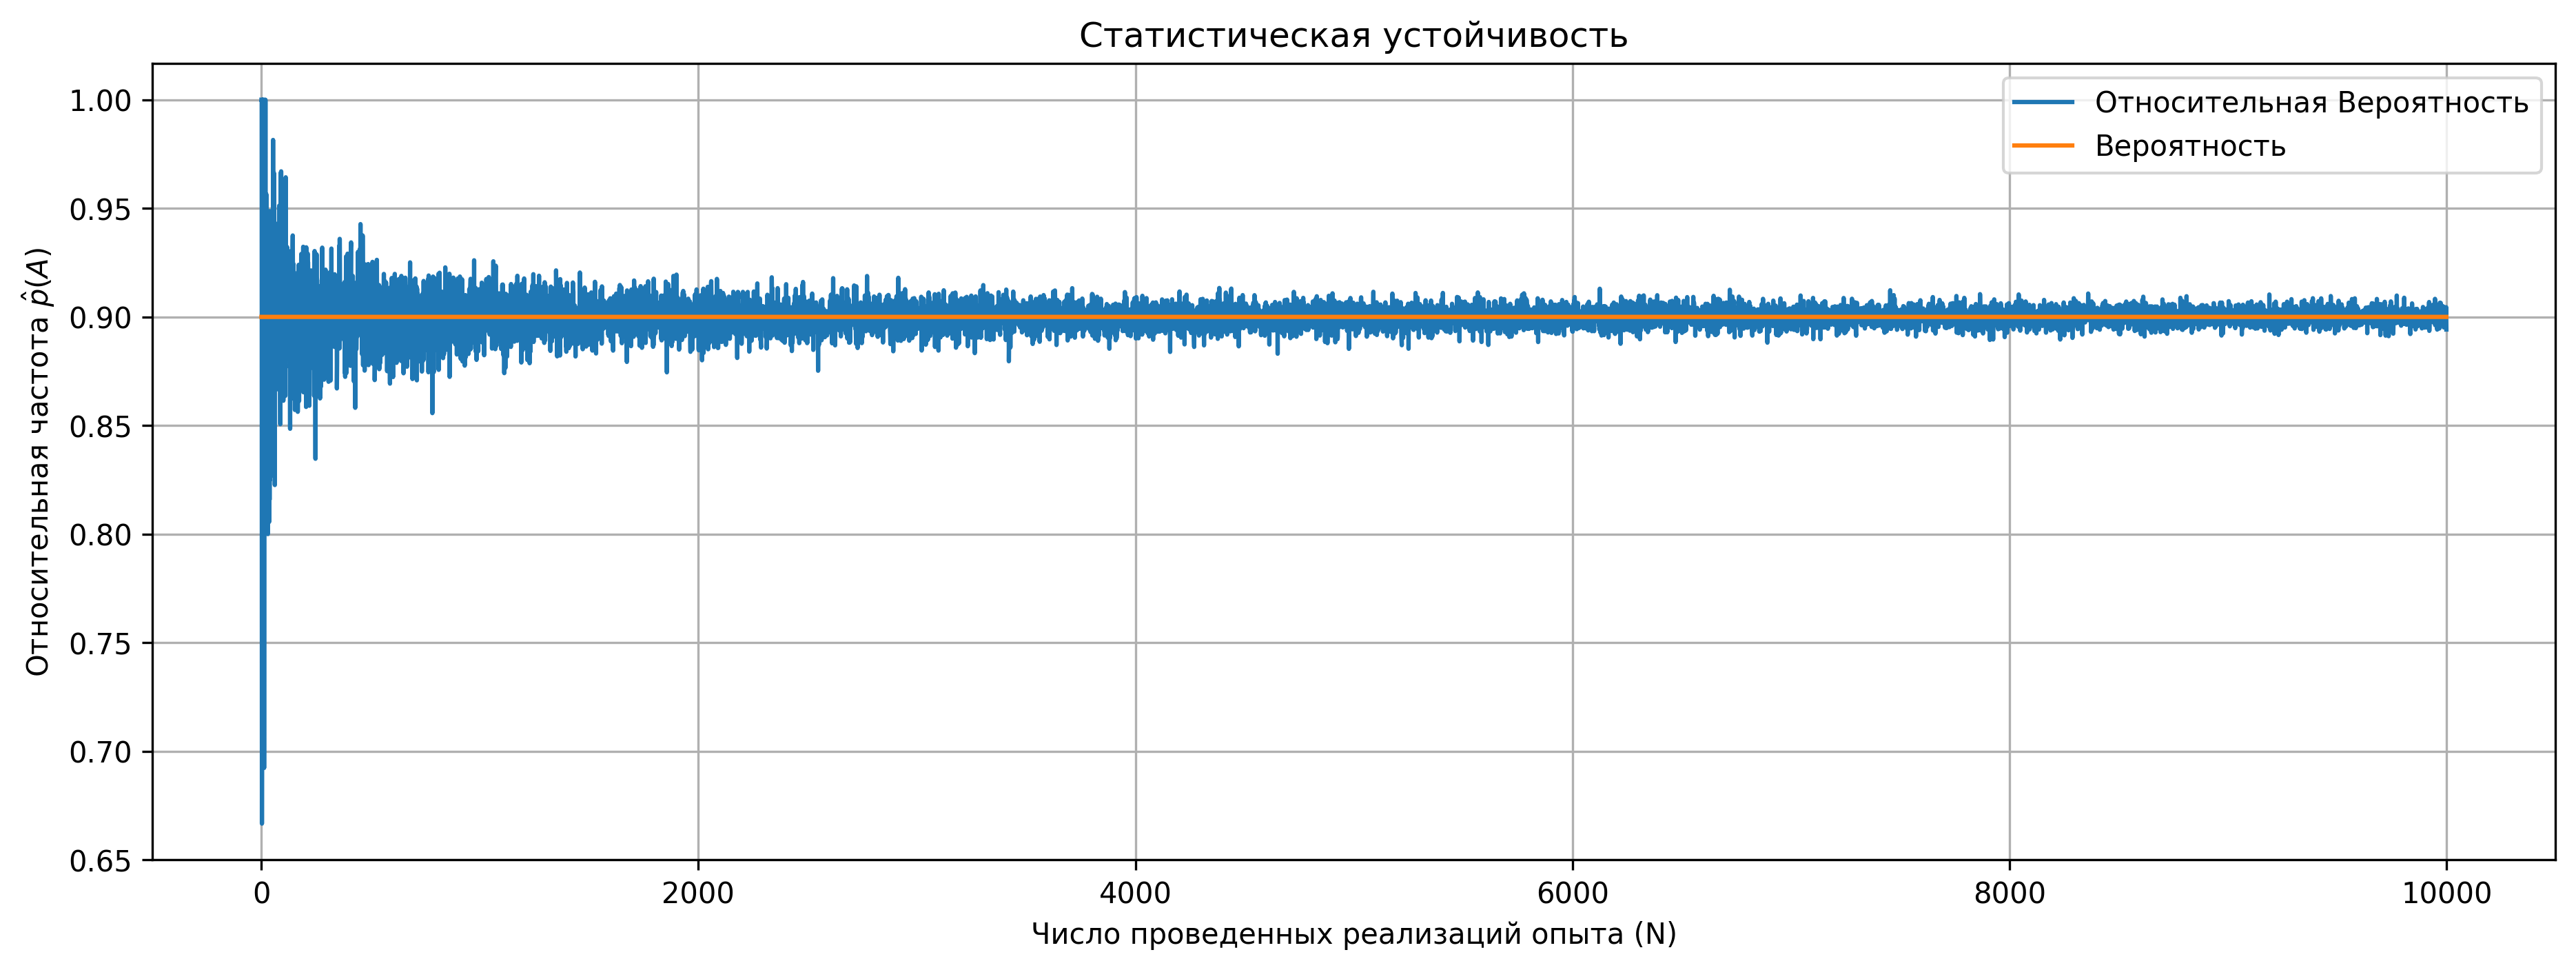

In [67]:
plot_var(x_ax, y_ax, 0.9)

# 7
Независимые случайные величины $X, Y, Z$ принимают только целые значения:   
$X$ – от $1$ до $13$ с вероятностью, пропорциональной принимаемому целому значению,   
т.е. $\mathbb P (X = i) = A \cdot i, i = 1, \ldots , 13$;  
Y – от $1$ до $12$ с вероятностью также пропорционально принимаемому значению $\mathbb P (Y = j) = B \cdot j, j = 1, \ldots , 12$;  
$Z$ – от $1$ до $8$ с вероятностью $\mathbb P (Z = k) = C \cdot k, k = 1, \ldots , 8$.   
Найдите вероятность того, что X, Y, Z примут разные значения, т.е. $\mathbb P (X  \neq Y \neq Z)$ и доказать ее статистическую устойчивость,
построив график зависимости относительной частоты указанного собы-
тия от числа экспериментов.

## Аналитика

Найдем $A$: $\mathbb P(X) = \frac{A}{13} + \frac{2A}{13} + \ldots + \frac{13A}{13} = 1; \frac{A + 13A}{2} = 1; A = \frac{1}{7}$  

Найдем $B$: $\mathbb P(Y) = \frac{B}{12} + \frac{2B}{12} + \ldots + \frac{12B}{12} = 1; \frac{B + 12B}{2} = 1; B = \frac{2}{13}$  

Найдем $C$: $\mathbb P(Z) = \frac{C}{8} + \frac{2C}{8} + \ldots + \frac{8C}{8} = 1; \frac{C + 8C}{2} = 1; C = \frac{2}{9}$

$\mathbb P(X \neq Y \neq Z) = 1 - \mathbb P(X = Y) - \mathbb P (Y = Z) - \mathbb P(X = Z) + \mathbb P(X = Y = Z)$

1. $\mathbb P(X = Y) = \frac{1}{13} \cdot \frac{1}{12} \cdot (\frac{1}{7} \cdot \frac{2}{13} + \frac{2}{7} \cdot \frac{2}{7} \cdot \frac{4}{13}) = \frac{1}{13} \cdot \frac{1}{12} \cdot \frac{1}{7} \cdot \frac{2}{13} \cdot 2 \cdot (1 + 4 + 9 + \ldots + 12^2) = \frac{50}{273}$

2. $\mathbb P(Y = Z) = \frac{1}{12} \cdot \frac{2}{13} \cdot \frac{1}{8} \cdot \frac{2}{9} \cdot (1 + 4 + 9 + \ldots + 8 ^ 2) = \frac{17}{234}$  

3. $\mathbb P(X = Z) = \frac{1}{13} \cdot \frac{1}{7} \cdot \frac{1}{8} \cdot \frac{2}{9} \cdot (1 + 4 + 9 + \ldots + 8^2) = \frac{17}{273}$

4. $\mathbb P(X = Y = Z) = \frac{1}{13} \cdot \frac{1}{7} \cdot \frac{1}{12} \cdot \frac{2}{13} \cdot \frac{1}{8} \cdot \frac{2}{9} \cdot (1 + 8 + 27 + \ldots + 8^3) = \frac{6}{1183}$

$\mathbb P(X \neq Y \neq Z) = 1 - \frac{50}{273} - \frac{17}{234} - \frac{17}{273} + \frac{6}{1183} \approx 0,78$

## Стохастический эксперимент

In [83]:
x = np.arange(1, 13 + 1)
y = np.arange(1, 12 + 1)
z = np.arange(1, 8 + 1)
vals = [x, y, z]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [80]:
px = [1/7 * i/13 for i in range(1, 13+1)]
py = [2/13 * i/12 for i in range(1, 12+1)]
pz = [2/9 * i/8 for i in range(1, 8+1)]

In [81]:
X = rv_discrete(name='X', values=(x, px))
Y = rv_discrete(name='Y', values=(y, py))
Z = rv_discrete(name='Z', values=(z, pz))

In [84]:
from itertools import product
Prob=0
for i, j, k in tqdm(product(*vals)):
    if i != j != k:
        Prob += X.pmf(i) * Y.pmf(j) * Z.pmf(k)
Prob

0it [00:00, ?it/s]

0.8408471870010332

## График

In [88]:
N = 10_000
x_ax = np.arange(1, N)
y_ax = []

for n in tqdm(range(1, N)):
    x = X.rvs(size=n)
    y = Y.rvs(size=n)
    z = Z.rvs(size=n)

    res = [x_ != y_ != z_ for x_, y_, z_ in zip(x, y, z)]

    y_ax.append(sum(res) / n)

  0%|          | 0/9999 [00:00<?, ?it/s]

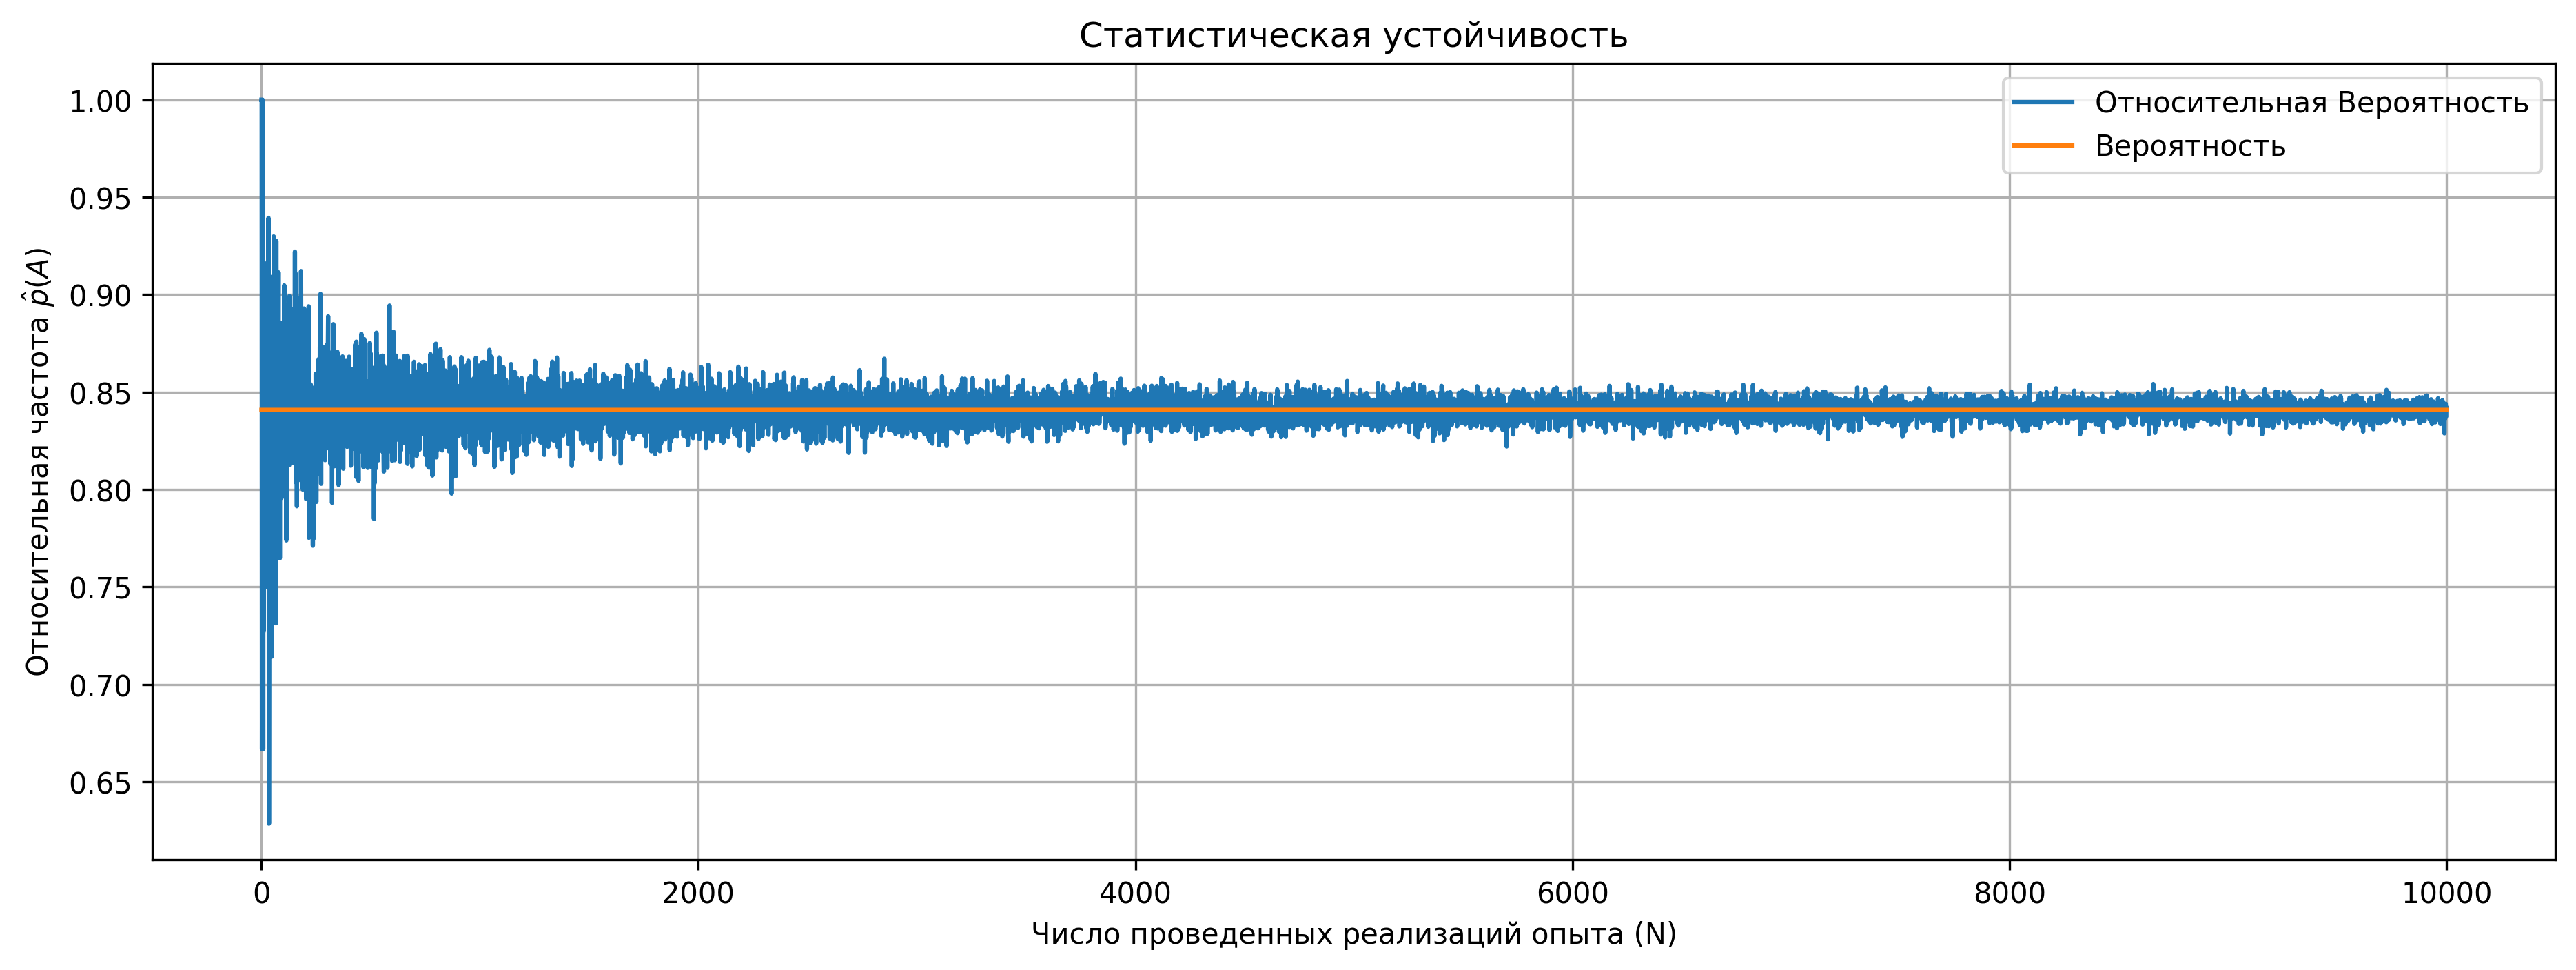

In [90]:
plot_var(x_ax, y_ax, 0.8408471870010332)

# 8
Независимые дискретные случайные величины $X_1, X_2, \ldots, X_{40}$ принимают только положительные или отрицательные значения, при этом $\mathbb P(X_i >
0) = 0,98$ для всех $X_i (i = 1, 2, \ldots , 40)$.   
Найдите $\mathbb P(X_1X_2 \dotsi X_{40} > 0)$ и доказать ее статистическую устойчивость, построив график зависимости относительной частоты указанного события от числа экспериментов.

## Аналитика:
$\mathbb P(X_1X_2 \dotsi X_{40} > 0) = (0,98)^{40}  + (0,98)^{38} \cdot (0,02)^2 + \ldots  = \sum_{n=0}^{20} C_{40}^{2n} \cdot 0,98^{40-2n} \cdot 0,02^{2n} \approx 0,59$

## Стохастический эксперимент